# How to determine the cuisine of a given recipe - improve supervised learning model #

**Business understanding - main objective of the analysis**

A researcher named Yong-Yeol Ahn scraped tens of thousands of food recipes (cuisines and ingredients) from different websites. For more information on Yong-Yeol Ahn and his research, you can read his paper on Flavor Network and the Principles of Food Pairing: http://yongyeol.com/papers/ahn-flavornet-2011.pdf.

The main objective of the analysis which I run during the course of Supervised Learning Classification was to predict the cuisine in each observation (recipe) based on the ingredients. You can find the notebook in GitHub: https://github.com/pcavad/miscellaneous/blob/main/Supervised_learning_classification.ipynb

Along the curse of the analysis of the data I found that the original dataset is unbalanced due to the prominent presence of recipes of the American cuisine which share more than 70% of the data. As consequence I decided to balance the recipes using Imbalanced-learn and cross validation. 

I now want to follow a different path and use different clustering techniques to:

- 1) understand the impact of clustering to the supervised classification,
- 2) measure how PCA affects the explained variance, and verify if PCA has any consequence to a supervised classification,
- 3) cluster the American cuisine which is prominent over the other cusisnes in terms of number of recipes, and achieve a better insight, 
- 4) based on the America cuisine measure the impact of PCA on performance for clustering

**Business Goal**

It is a data-driven investigation to open new avenues in a systematic understanding of culinary practice. Researchers raised the question whether there are any general patterns that determine the ingredient combinations used in food, which trascend the individual tastes and recipes. 


**Summary and key findings**

Insights:

| Cuisines | Recipes | Top 1 | Top 2 | Top 3 | Top 4 | Top 5 |
| --- | --- | --- | --- | --- | --- | --- |
| american | 40150 | butter (0.41) | egg (0.41) | wheat (0.4) | onion (0.29) | milk (0.27) |
| italian | 3250 | olive_oil (0.61) | garlic (0.53) | tomato (0.39) | onion (0.33) | basil (0.31) |
| mexican | 2390 | cayenne (0.74) | onion (0.68) | garlic (0.62) | tomato (0.59) | corn (0.32) |
| french | 1264 | butter (0.5) | egg (0.44) | wheat (0.37) | olive_oil (0.28) | cream (0.27) |
| asian | 1193 | soy_sauce (0.5) | ginger (0.49) | garlic (0.48) | rice (0.41) | scallion (0.38) |

| Ingredients | Occurrence | Top 1 | Top 2 | Top 3 | Top 4 | Top 5 |
| --- | --- | --- | --- | --- | --- | --- |
| onion | 0.41 | bangladesh (1.0) | west_african (0.85) | pakistan (0.74) | cajun_creole (0.7) | mexican (0.68) |
| garlic | 0.40 | pakistan (0.84) | bangladesh (0.75) | vietnamese (0.73) | indonesian (0.67) | turkish (0.62) |
| wheat | 0.33 | dutch (0.94) | belgian (0.91) | austrian (0.81) | swiss (0.7) | german (0.65) |
| egg | 0.29 | austrian (0.81) | dutch (0.69) | german (0.61) | jewish (0.59) | uk_scottish (0.53) |
| butter | 0.28 | dutch (0.78) | belgian (0.73) | austrian (0.71) | swiss (0.7) | uk_scottish (0.67) |


1) I run Kmeans with different cluster numbers to find the elbow, I chose 5 clusters which is incidentally close to the number of cuisines. The clustered cuisines show more balanced than the classified cuisines:

| Cluster | Recipes | Top 1 | Top 2 | Top 3 | Top 4 | Top 5 |
| --- | --- | --- | --- | --- | --- | --- |
| 1 | 14569 | butter (0.22)|cream (0.18)|vegetable_oil (0.17)|egg (0.16)|milk (0.14)|
| 2 | 14267 | wheat (0.92)|egg (0.83)|butter (0.74)|milk (0.52)|vanilla (0.5)|
| 3 | 7387 | onion (0.96)|butter (0.41)|pepper (0.35)|egg (0.34)|vegetable_oil (0.31)|
| 4 | 6364 | olive_oil (0.85)|garlic (0.81)|tomato (0.49)|onion (0.42)|basil (0.41)|
| 0 | 5660 | onion (0.84)|garlic (0.84)|tomato (0.69)|cayenne (0.66)|vinegar (0.44)|

A one to one mapping shows that American is dominant in all clusters because of the bias, but beyond that Mexican prevails in cluster 0 and Italian in cluster 4, Asian in cluster 1, and French is balanced except in 0:

|cuisine_KM|cuisine||
| --- | --- | --- |
|0|american|3759|
||asian|275|
||french|20|
||italian|68|
||mexican|1538|
|1|american|12387|
||asian|800|
||french|408|
||italian|604|
||mexican|370|
|2|american|13252|
||asian|27|
||french|384|
||italian|450|
||mexican|154|
|3|american|6686|
||asian|55|
||french|194|
||italian|250|
||mexican|202|
|4|american|4066|
||asian|36|
||french|258|
||italian|1878|
||mexican|126|

I run a Logistic Regression with and without the column which includes the clustering labels. Howvere, clustering didn't really impact the supervised classification:

| Model | F1 score | 
| --- | --- | 
| Logisitic Regression with KMeans | 0.8406 | 
| Logisitc Regression without KMeans | 0.8402 | 


2) PCA showed to be very efficient to reduce the curse of dimensionality:

| Components | PCA | F1 score |
| --- | --- | --- |
| 10 | PCA(n_components=10) | 0.47 | 
| 50 | PCA(n_components=50) | 0.77 | 
| 100 | PCA(n_components=100) | 0.90 | 
| 200 | PCA(n_components=200) | 0.99 | 
| 300 | PCA(n_components=300) | 1.00 | 


Classifications wasn't much affected by PCA:

| Components | F1 score | 
| --- | --- | 
| 10 | 0.81 | 
| 50 | 0.82 | 
| 100 | 0.83 
| 200 | 0.84 
| 300 | 0.84 


3) Broken down the America cuisine for a better insight:

|cuisine|recipes|1st|2nd|3rd|4th|5th|
| --- | --- | --- | --- | --- | --- | --- | 
|3|12490|wheat (0.92)|egg (0.84)|butter (0.75)|milk (0.53)|vanilla (0.52)|
|0|11961|butter (0.27)|cream (0.19)|milk (0.15)|wheat (0.12)|garlic (0.1)|
|2|8844|garlic (0.8)|onion (0.69)|tomato (0.51)|olive_oil (0.44)|black_pepper (0.36)|
|1|6855|onion (0.73)|egg (0.61)|vegetable_oil (0.55)|butter (0.37)|pepper (0.36)|


4) I searched for the elbow with PCA (200 components) in 46.28 sec. Without PCA the clustering run in 72.85 sec. So PCA saved more than 30% of the time.

**Possible flaws in the model and possible improvements**

The model is affected by a bias in the original data in which the number of American recipes dominates on top of other very important cuisines, such as the Asian. I addressed this issue in a previous notebook for classification but not this time. In addition my ability to use Grid Search and cross validation was limited by the proecssing power of my computer. So I do think that possible improvements come back with an activity to collect more balanced data as well it could also be possible to work to a taxonomy to classify the different cuisines with more detail.

**Brief description of the data**

Our dataset consists of 57,691 recipes. Each observation represents a recipe, and for each recipe the corresponding cuisine is documented as well as whether 384 ingredients exist in the recipe or not, beginning with almond and ending with zucchini.

Initial plan for data exploration, the dataset is stored in a csv file:

- check the schema: snake case style, all lowercase
- basic info: data types, null values, any missing values to replace
- shape: total number of recipes 57,691, 384 ingredients, 69 different cuisines
- check format of the data and naming conventions
- verify need to scale data, standardize, normalize, binning, encoding
- descriptive statistics: check any bias between cuisines and ingredients

Actions taken for data cleaning and feature engineering:
    
- updated column country into cuisine
- updated all cuisines to lower case
- standardized cuisines names (e.g. Japan into Japanese)
- aggregated some cuisines (e.g. Italian + Italy into Italian)
- removed the cuisines with less than 1000 recipes which proved to improve classification in the other notebook
- dropped ingredients with high correlation
- encoded features and labels

**Thank you! You can see the notebook below if you would like to check the details.**

In [1]:
import os
import time
import warnings
warnings.filterwarnings('ignore')

# third part
import pandas as pd
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.style.use('ggplot')
import math
import numpy as np
import seaborn as sns
sns.set_theme(style="darkgrid")
from colorsetup import colors, palette #course module
from scipy.spatial.distance import cdist

#sklearn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

**ETL**

In [2]:
filepath = 'recipes.csv'

# set folder to data if not already in
if os.listdir()[0] != filepath:
    os.chdir('data')

# read the csv file in a dataframe
try:
    recipes = pd.read_csv(filepath)
    print('Shape of the dataset: {}\n'.format(recipes.shape))
except Exception as e:
    print(e)

# show 2 sample observations    
recipes.sample(2)

Shape of the dataset: (57691, 385)



,Unnamed: 0,country,almond,angelica,anise,anise_seed,apple,...,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
35064,35064,American,No,No,No,No,No,...,No,No,No,No,No,No,No
26193,26193,American,No,No,No,No,No,...,No,No,No,No,No,No,No


In [3]:
# drop unnamed column
recipes.drop(['Unnamed: 0'], axis=1, inplace=True)

# rename country into cuisine
recipes.rename(columns={'country':'cuisine'}, inplace=True)

I look at the cuisines names in order to understand if they need to be standardized.

In [4]:
# show cuisines unique names
np.sort(recipes.cuisine.unique())

array(['African', 'American', 'Asian', 'Austria', 'Bangladesh', 'Belgium',
       'Cajun_Creole', 'Canada', 'Caribbean', 'Central_SouthAmerican',
       'China', 'Chinese', 'East-African', 'Eastern-Europe',
       'EasternEuropean_Russian', 'English_Scottish', 'France', 'French',
       'German', 'Germany', 'Greek', 'India', 'Indian', 'Indonesia',
       'Iran', 'Irish', 'Israel', 'Italian', 'Italy', 'Japan', 'Japanese',
       'Jewish', 'Korea', 'Lebanon', 'Malaysia', 'Mediterranean',
       'Mexican', 'Mexico', 'MiddleEastern', 'Moroccan', 'Netherlands',
       'North-African', 'Pakistan', 'Philippines', 'Portugal',
       'Scandinavia', 'Scandinavian', 'South-African', 'South-America',
       'Southern_SoulFood', 'Southwestern', 'Spain', 'Spanish_Portuguese',
       'Switzerland', 'Thai', 'Thailand', 'Turkey', 'UK-and-Ireland',
       'Vietnam', 'Vietnamese', 'West-African', 'asian', 'chinese',
       'east_asian', 'italian', 'japanese', 'korean', 'mexico', 'western'],
      dtype=o

In [5]:
# apply lower case to column names for consistency
recipes['cuisine'] = recipes.cuisine.str.lower()

# standardize cuisine names
recipes.cuisine.replace(['austria' #to replace
                        , 'china'
                        ,'east-african'
                        , 'eastern-europe'
                        , 'france'
                        , 'germany'
                        , 'india'
                        , 'indonesia'
                        , 'iran'
                        , 'italy'
                        , 'japan'
                        , 'israel'
                        , 'korea'
                        , 'mexico'
                        , 'scandinavia'
                        , 'north-african'
                        , 'south-african'
                        , 'south-america'
                        , 'spain'
                        , 'portugal'
                        , 'thailand'
                        , 'uk-and-ireland'
                        , 'irish'
                        , 'english_scottish'
                        , 'vietnam'
                        , 'west-african'
                        , 'canada'
                        , 'eastern_europe'
                        , 'easterneuropean_russian'
                        , 'southwestern'
                        , 'netherlands'
                        , 'lebanon'
                        , 'switzerland'
                        , 'turkey'
                        , 'belgium'],
                        ['austrian' #replace with
                        , 'chinese'
                        , 'east_african'
                        , 'eastern_europe'
                        , 'french'
                        , 'german'
                        , 'indian'
                        , 'indonesian'
                        , 'iranian'
                        , 'italian'
                        , 'japanese'
                        , 'jewish'
                        , 'korean'
                        , 'mexican'
                        , 'scandinavian'
                        , 'north_african'
                        , 'south_african'
                        , 'south_american'
                        , 'spanish'
                        , 'portuguese'
                        , 'thai'
                        , 'uk_irish'
                        , 'uk_irish'
                        , 'uk_scottish'
                        , 'vietnamese'
                        , 'west_african'
                        , 'canadian'
                        , 'east_european'
                        , 'east_european_russian'
                        , 'south_western'
                        , 'dutch'
                        , 'lebanese'
                        , 'swiss'
                        , 'turkish'
                        , 'belgian']
                        , inplace=True)

print('The total number of cuisines is {} after the standardization.'.format(recipes.cuisine.value_counts().shape[0]))

The total number of cuisines is 51 after the standardization.


In [6]:
# show basic information

print('data types: {}, {}\n'
      .format(recipes.dtypes.value_counts().index[0]
              , recipes.dtypes.value_counts().values[0]))

print('Null values: {}\n'
      .format(recipes.isnull().sum().any())) 

print('Ingredients are all Yes/No: {}\n'
      .format(recipes.iloc[:,1:].isin(['Yes', 'No']).sum().all()))

print('The total number of recipes is: {:,}\n'
      .format(recipes.shape[0]))

print('The total number of unique cuisines is: {}\n'
      .format(len(recipes.cuisine.unique())))

print('The total number of unique ingredients is: {}\n'
      .format(len(recipes.iloc[:,1:].columns.unique())))

print('Top 10 cuisines by number of recipes, normalized:\n')
recipes.cuisine.value_counts(normalize=True)[:10]

data types: object, 384

Null values: False

Ingredients are all Yes/No: True

The total number of recipes is: 57,691

The total number of unique cuisines is: 51

The total number of unique ingredients is: 383

Top 10 cuisines by number of recipes, normalized:



american     0.70
italian      0.06
mexican      0.04
french       0.02
asian        0.02
east_asian   0.02
korean       0.01
canadian     0.01
indian       0.01
western      0.01
Name: cuisine, dtype: float64

**-->Bias to address: the American cuisine shares 70% of the recipes with respect of 69 cuisines in total.**

**Insight into the data**

I would like to visiualize the most important ingredients for the different cuisines, and viceversa the most important cuisines for the different ingredients.

In [7]:
# list top 5 ingredients by cuisine 

def list_top5_ingredients(recipes, enc=0):
    '''
    This function shows the top 5 ingredients by cuisine (sorted by the most recurring cuisine).
    It takes as inputs the recipes dataframe and encoded vs not encoded
    '''
    
    if enc == 0:
        # encoding the ingredients and grouping
        cuisines = recipes.replace(['No','Yes'],[0,1]).groupby('cuisine').mean()
    else:
        cuisines = recipes.groupby('cuisine').mean()

    # computing the number of recipes by cuisines for sorting
    cuisines['rank'] = recipes.groupby('cuisine')['cuisine'].count().astype('int')

    dim = cuisines.shape[1]
    l_top_5_ingredients = []

    # filling the list with dictionaries, one for each cuisine and the top ingredients
    for cuisine in cuisines.index:
        top_5_arr_index = np.array(cuisines.loc[cuisine,:][0:dim-1].nlargest(5).index)
        top_5_arr_values = np.array(cuisines.loc[cuisine,:][0:dim-1].nlargest(5).round(2).values)
        d_top_5_ingredients = {'cuisine':cuisine
                               , 'rank': cuisines.loc[cuisine,'rank']
                               , '1st': top_5_arr_index[0] + ' (' + str(top_5_arr_values[0]) + ')'
                               , '2nd': top_5_arr_index[1] + ' (' + str(top_5_arr_values[1]) + ')'
                               , '3rd': top_5_arr_index[2] + ' (' + str(top_5_arr_values[2]) + ')'
                               , '4th': top_5_arr_index[3] + ' (' + str(top_5_arr_values[3]) + ')'
                               , '5th': top_5_arr_index[4] + ' (' + str(top_5_arr_values[4]) + ')'}
        l_top_5_ingredients.append(d_top_5_ingredients)

    # creating the dataframe
    cuisines_sorted = pd.DataFrame(l_top_5_ingredients).set_index('cuisine').sort_values('rank', ascending=False)

    # filtering for the 10 most important cuisines
    display(cuisines_sorted[0:10])

    #clean memory
    del(cuisines)
    del(cuisines_sorted)

In [8]:
# list top 5 cuisines by ingredient

def list_top5_cuisines(recipes, enc=0):
    '''
    This function shows the top 5 cuisines by ingredient (sorted by the most recurring ingredient).
    It takes as inputs the recipes dataframe and encoded vs not encoded
    '''
    
    if enc == 0:
        # encoding the ingredients
        ingredients = recipes.replace(['No','Yes'],[0,1]).groupby('cuisine').mean().T
    else:
        ingredients = recipes.groupby('cuisine').mean().T

    l_top_5_cuisines = []

    # filling the list with dictionaries, one for each ingredient and the top cuisines
    for ingredient in ingredients.index:
        top_5_arr_index = np.array(ingredients.loc[ingredient,:].nlargest(5).index)
        top_5_arr_values = np.array(ingredients.loc[ingredient,:].nlargest(5).round(2).values)
        d_top_5_cuisines = {'ingredient':ingredient
                               , 'rank': ingredients.loc[ingredient,:].mean()
                               , '1st': top_5_arr_index[0] + ' (' + str(top_5_arr_values[0]) + ')'
                               , '2nd': top_5_arr_index[1] + ' (' + str(top_5_arr_values[1]) + ')'
                               , '3rd': top_5_arr_index[2] + ' (' + str(top_5_arr_values[2]) + ')'
                               , '4th': top_5_arr_index[3] + ' (' + str(top_5_arr_values[3]) + ')'
                               , '5th': top_5_arr_index[4] + ' (' + str(top_5_arr_values[4]) + ')'}
        l_top_5_cuisines.append(d_top_5_cuisines)

    # creating the dataframe
    ingredients_sorted = pd.DataFrame(l_top_5_cuisines).set_index('ingredient').sort_values('rank', ascending=False)

    # filtering for the 10 most important ingredients
    display(ingredients_sorted[0:10])

    #clean memory
    del(ingredients)
    del(ingredients_sorted)

In [9]:
list_top5_ingredients(recipes)

,rank,1st,2nd,3rd,4th,5th
cuisine,,,,,,
american,40150,butter (0.41),egg (0.41),wheat (0.4),onion (0.29),milk (0.27)
italian,3250,olive_oil (0.61),garlic (0.53),tomato (0.39),onion (0.33),basil (0.31)
mexican,2390,cayenne (0.74),onion (0.68),garlic (0.62),tomato (0.59),corn (0.32)
french,1264,butter (0.5),egg (0.44),wheat (0.37),olive_oil (0.28),cream (0.27)
asian,1193,soy_sauce (0.5),ginger (0.49),garlic (0.48),rice (0.41),scallion (0.38)
east_asian,951,garlic (0.55),soy_sauce (0.5),scallion (0.5),cayenne (0.48),sesame_oil (0.39)
korean,799,garlic (0.59),scallion (0.52),cayenne (0.52),soy_sauce (0.49),sesame_oil (0.43)
canadian,774,wheat (0.4),butter (0.38),egg (0.35),onion (0.34),garlic (0.27)
indian,598,cumin (0.6),turmeric (0.51),onion (0.5),coriander (0.48),cayenne (0.47)


In [10]:
list_top5_cuisines(recipes)

,rank,1st,2nd,3rd,4th,5th
ingredient,,,,,,
onion,0.41,bangladesh (1.0),west_african (0.85),pakistan (0.74),cajun_creole (0.7),mexican (0.68)
garlic,0.40,pakistan (0.84),bangladesh (0.75),vietnamese (0.73),indonesian (0.67),turkish (0.62)
wheat,0.33,dutch (0.94),belgian (0.91),austrian (0.81),swiss (0.65),german (0.65)
egg,0.29,austrian (0.81),dutch (0.69),german (0.61),jewish (0.59),uk_scottish (0.53)
butter,0.28,dutch (0.78),belgian (0.73),austrian (0.71),swiss (0.7),uk_scottish (0.67)
vegetable_oil,0.25,bangladesh (1.0),pakistan (0.63),indonesian (0.5),philippines (0.49),malaysia (0.44)
cayenne,0.24,bangladesh (1.0),south_western (0.81),mexican (0.74),pakistan (0.63),west_african (0.62)
olive_oil,0.23,mediterranean (0.8),greek (0.76),moroccan (0.73),lebanese (0.65),spanish_portuguese (0.63)
black_pepper,0.22,pakistan (0.42),philippines (0.42),western (0.36),belgian (0.36),korean (0.36)


**Feature engineering**

In the supervised classification notebook I used Imbalanced Learn to balance the labels, in other words the proportions between different cuisines. I won't repeat this exercise here because it is out of the scope but I will still reduce the dataset by means of removing the cuisines will less than 1000 recipes because I verified that such action brings up the accuracy of classification (F1 score). I will also encode the features and the labels. I won't apply feature scaling because the features are hot encoded (0/1) and I verified that scaling doesn't improve clustering.

In [11]:
# copy the recipes to a new dataframe and cut the cuisines with less than 1000 recipes
recipes_num = recipes.copy()
num = 1000

# remove cousines with less than num_recipe recipes
recipes_num_index = pd.DataFrame([{i} for (i, x) 
                            in zip(recipes.cuisine.value_counts().index, recipes.cuisine.value_counts()) 
                            if x < num]
                            , columns=['cuisine'])\
                            .set_index('cuisine')

# set recipes index to filter
recipes_num.set_index('cuisine', inplace=True)

# drop cuisines with less than num_recipe recipes
recipes_num.drop(recipes_num_index.index, axis=0, inplace=True)

# reset recipes index after removing rows
recipes_num.reset_index(inplace=True)

print('The total number of unique cuisines is now: {}\n'
      .format(len(recipes_num.cuisine.unique())))

The total number of unique cuisines is now: 5



In [12]:
# encode features
recipes_encoded = recipes_num.replace(['No','Yes'],[0,1])
recipes_encoded[0:2]

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,...,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,french,0,0,0,0,0,0,...,0,0,0,0,0,0,0
1,french,0,0,0,0,0,0,...,0,0,0,0,0,0,0


In [13]:
# show the most correlated features (>0.7)

# correlation matrix
corr_mat = recipes_encoded.iloc[:,1:].corr()

# set to zero the diagonal 
for x in range(len(corr_mat)):
    corr_mat.iloc[x,x] = 0.0
    
# Pairwise maximal correlations
corr_values = pd.concat([corr_mat.abs().idxmax(), corr_mat.abs().max()], axis=1)\
                .rename(columns={0:'feature', 1:'corr'})

corr_values[corr_values['corr'] > 0.7].sort_values('corr', ascending=False)

,feature,corr
geranium,pelargonium,1.00
pelargonium,geranium,1.00
fenugreek,turmeric,0.89
turmeric,fenugreek,0.89
coriander,fenugreek,0.77


In [14]:
# dropping the high correlated features
recipes_encoded.drop(['geranium', 'fenugreek'], axis = 1, inplace=True)

In [15]:
# copy the encoded features to a new dataframe
X = recipes_encoded.iloc[:,1:].copy()

# encode labels
le = LabelEncoder()
y = pd.Series(le.fit_transform(recipes_encoded.iloc[:,0]))

**Case 1: explore use of KMeans for feature engineering in classification**


In [16]:
# run KMeans to find the elbow

def plot_inertia(X, num_clusters=11):
    '''
    This function plots the KMeans inertia and takes as parameters the features and the number of clusters
    '''

    km_list = []
    list_num_clusters = list(range(1,num_clusters))
    for num_clusters in list_num_clusters:
        km = KMeans(n_clusters=num_clusters)
        km.fit(X)
        km_list.append(pd.Series({'clusters': num_clusters, 
                                  'inertia': km.inertia_,
                                  'model': km}))

    plot_inertia = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

    fig, ax = plt.subplots(1,1,figsize=(12,6))
    plot_inertia.plot(marker='o',ls='-', ax=ax)
    ax.set_xticks(range(1,num_clusters,1))
    ax.set_xlim(1,num_clusters)
    ax.set(xlabel='Cluster', ylabel='Inertia');
    plt.show()

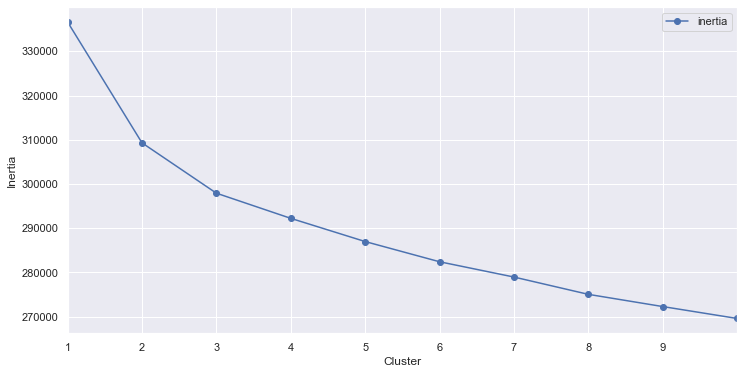

In [17]:
plot_inertia(X,11)

In [18]:
# run KMeans with 5 clusters (same as the labeled cuisines)

km = KMeans(n_clusters=5, random_state=42)
km = km.fit(X)

# add KMeans labels to the features which may/may not help classification
X['kmeans'] = km.predict(X)

In [19]:
# compare a Logistic Regression with and without the support of KMeans

# features including KMeans
X_with_kmeans = X

# original features
X_without_kmeans = X_with_kmeans.drop('kmeans', axis=1)

# stratified split index
sss = StratifiedShuffleSplit(n_splits=5, random_state=42)

# estimator used for supervised classification
estimator = LogisticRegression()

def get_avg_f1_score(estimator, X, y):
    '''
    This function calculates the F1 score for the estimator, the features and the labels
    '''
    
    f1_list = []
    
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        estimator.fit(X_train, y_train)
        y_predicted = estimator.predict(X_test)
        f1_list.append(f1_score(y_test, y_predicted, average='weighted'))
        
    return np.mean(f1_list)

# call the function with KMeans
f1_with_kmeans = get_avg_f1_score(estimator, X_with_kmeans, y)

# call the function without KMeans
f1_without_kmeans = get_avg_f1_score(estimator, X_without_kmeans, y)

# dropping the KMeans feature
X.drop('kmeans', axis=1)

print("Just run Logistic Regression, the F1 score is {:.4f}".format(f1_without_kmeans))
print("Using kmeans cluster as input to Logistic Regression, the F1 score is {:.4f}".format(f1_with_kmeans))

Just run Logistic Regression, the F1 score is 0.8406
Using kmeans cluster as input to Logistic Regression, the F1 score is 0.8402


In [20]:
# fit the model with KMeans and show the predicted cuisines 

km.fit(X_with_kmeans)

y_pred = km.predict(X_with_kmeans)

predicted_cuisines = pd.concat([pd.Series(y_pred, name='cuisine')
                                , X_with_kmeans.drop('kmeans', axis=1).reset_index(drop=True)]
                               , axis=1)

# show the top 5 ingredients for the predicted cuisines
list_top5_ingredients(predicted_cuisines, enc=1)

,rank,1st,2nd,3rd,4th,5th
cuisine,,,,,,
1,14569,butter (0.22),cream (0.18),vegetable_oil (0.17),egg (0.16),milk (0.14)
2,14267,wheat (0.92),egg (0.83),butter (0.74),milk (0.52),vanilla (0.5)
3,7387,onion (0.96),butter (0.41),pepper (0.35),egg (0.34),vegetable_oil (0.31)
4,6364,olive_oil (0.85),garlic (0.81),tomato (0.49),onion (0.42),basil (0.41)
0,5660,onion (0.84),garlic (0.84),tomato (0.69),cayenne (0.66),vinegar (0.44)


In [21]:
# show the predicted cuisines next to the original labels

predicted_cuisines = pd.concat([recipes_encoded.iloc[:,0]
                                , pd.Series(y_pred, name='cuisine_KM')
                                , X_with_kmeans.drop('kmeans', axis=1).reset_index(drop=True)]
                               , axis=1)

display(predicted_cuisines.groupby(['cuisine_KM', 'cuisine']).size().to_frame())

# display(predicted_cuisines.groupby(['cuisine', 'cuisine_KM']).size().to_frame())

0
cuisine_KM cuisine        
0          american   3759
           asian       275
           french       20
           italian      68
           mexican    1538
1          american  12387
           asian       800
           french      408
           italian     604
           mexican     370
2          american  13252
           asian        27
           french      384
           italian     450
           mexican     154
3          american   6686
           asian        55
           french      194
           italian     250
           mexican     202
4          american   4066
           asian        36
           french      258
           italian    1878
           mexican     126

**Case 2: explore use of PCA for feature engineering in classification**

In [22]:
# fit a range of PCA models to evaluate the explained variance

pca_list = []

# the number of features are in the range of the features in the dataset
for n in [10, 50,100,200,300]:
    
    # create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(X)
    
    # store the model and variance
    pca_list.append(pd.Series({'n':n
                               , 'model':PCAmod
                               , 'var': PCAmod.explained_variance_ratio_.sum()}))

pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

,model,var
n,,
10,PCA(n_components=10),0.47
50,PCA(n_components=50),0.77
100,PCA(n_components=100),0.90
200,PCA(n_components=200),0.99
300,PCA(n_components=300),1.00


In [23]:
# PCA applied to classification

f1_list = []

# the number of features are in the range of the features in the dataset
for n in [10,50,100,200,300]:
    
    # pipeline with PCA and estimator
    pipe_list = [
    ('pca', PCA(n_components=n)),
    ('estimator', LogisticRegression())
    ]
    pipe = Pipeline(pipe_list)
    
    f1_list_sss = []
    
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        pipe.fit(X_train, y_train)
        y_predicted = pipe.predict(X_test)
        f1_list_sss.append(f1_score(y_test, y_predicted, average='weighted'))
    
    f1_list.append({'n':n, 'f1': np.mean(f1_list_sss)})
    
# show how much the dimensionality reduction affected the supervised classification
pd.DataFrame(f1_list)

,n,f1
0,10,0.81
1,50,0.82
2,100,0.83
3,200,0.84
4,300,0.84


**Case 3: explore use of KMeans to break-down supervised classification**

In [24]:
# extract the American recipes from the recipes dataset

american_recipes = recipes_encoded.set_index('cuisine').loc['american',:]
american_recipes.shape

(40150, 381)

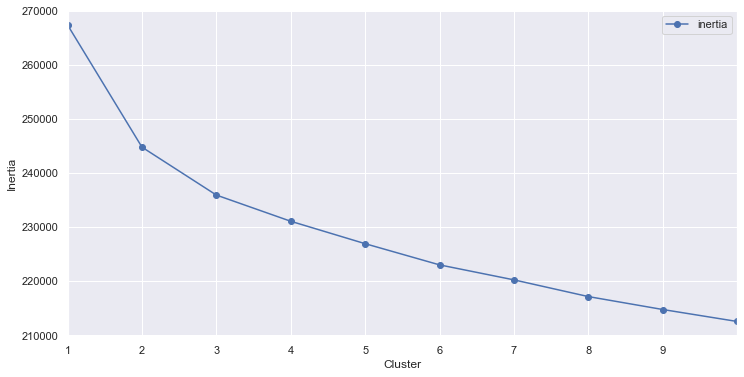

Run in 46.28 seconds.


In [25]:
# show the intertia using PCA=200

# start time
start_time = time.time()

# fit and transform the features
PCAmod = PCA(n_components=200)
american_recipes_pca = PCAmod.fit_transform(american_recipes)

# plot the inertia with PCA
plot_inertia(american_recipes_pca)

# show the time to run
print('Run in {:.2f} seconds.'.format(time.time() - start_time))

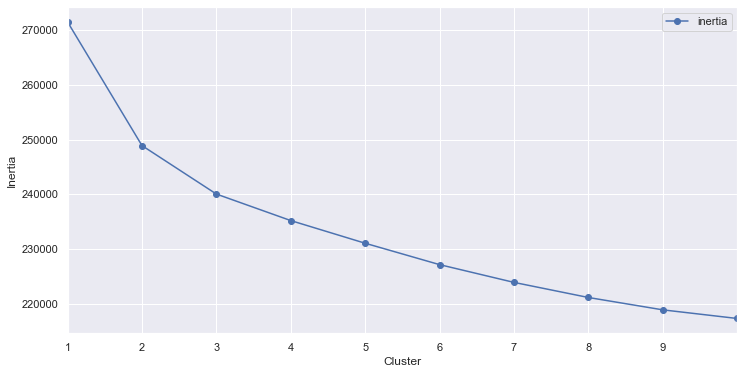

Run in 72.85 seconds.


In [26]:
# show the intertia without PCA

# start time
start_time = time.time()

# plot the inertia without PCA
plot_inertia(american_recipes)

# show the time to run
print('Run in {:.2f} seconds.'.format(time.time() - start_time))

In [27]:
# cluster the American recipes to break-down the classification

km = KMeans(n_clusters=4)

km.fit(american_recipes)

y = km.predict(american_recipes)

american_cuisines = pd.concat([pd.Series(y, name='cuisine'), american_recipes.reset_index(drop=True)], axis=1)

In [28]:
list_top5_ingredients(american_cuisines, enc=1)

,rank,1st,2nd,3rd,4th,5th
cuisine,,,,,,
3,12490,wheat (0.92),egg (0.84),butter (0.75),milk (0.53),vanilla (0.52)
0,11961,butter (0.27),cream (0.19),milk (0.15),wheat (0.12),garlic (0.1)
2,8844,garlic (0.8),onion (0.69),tomato (0.51),olive_oil (0.44),black_pepper (0.36)
1,6855,onion (0.73),egg (0.61),vegetable_oil (0.55),butter (0.37),pepper (0.36)


**THANK YOU!**